**Question 5**

A treadmill manufacturer has developed a new machine with softer tread and better fans than its current model. The manufacturer believes these new features will enable runners to run for longer times than they can on its current machines. To determine whether the desired result is achieved, the manufacturer randomly sampled 35 runners. Each runner was measured for one week on the current machine and for one week on the new machine. The weekly total number of minutes for each runner on the two types of machines was collected. The results are contained in the file Treadmill. At the 0.02 level of significance, can the treadmill manufacturer conclude that the new machine has the desired result?

**Summarize**

- Population parameter is the total number of minutes for each runner
- Null Hypothesis: New model enable runner to run less or equal than older model
- Alternative Hypothesis: New model enable runner to run much longer than older model (claim)
- Based on the statement given, one sided (right) or one tailed test
- Level of significance is 98%
- Alpha value is at 0.02

In [1]:
# import all relevant python libraries

import numpy as np
import pandas as pd
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats

In [2]:
# checking the dataset

tm = pd.read_excel("Treadmill.xlsx", sheet_name="Data", usecols=np.r_[0:3])         # they are undefine features appear when file being load, use usecols arg to retrive certain columns
print(tm.head(5), "\n")
print(tm.dtypes, "\n")
print(tm.shape, "\n")
print(tm.isnull().sum())

   Runner  Current  New
0       1      302  404
1       2      289  494
2       3      380  251
3       4      438  343
4       5      342  402 

Runner     int64
Current    int64
New        int64
dtype: object 

(35, 3) 

Runner     0
Current    0
New        0
dtype: int64


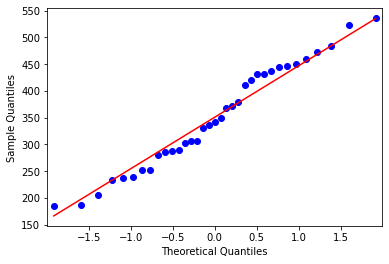

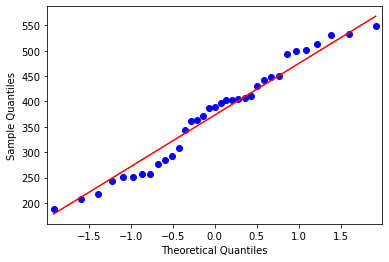

In [3]:
# perform visual normality test

qqplot(tm['Current'], line='s')
qqplot(tm['New'], line='s')
plt.show()

In [4]:
# perform numerical normality test on current data feature
# using the Shapiro Wikk Test, sample size less than 50 

confidence_level = 0.98                                 # specify the confidence level
alpha = (1-confidence_level)                            # calculate alpha 
x = tm['Current']
stats, p = scipy.stats.shapiro(x)
print('H_null - Data is normally distributed')
print('H_alt - Data is not normally distributed', "\n")
print('Shapiro Statistics=%.3f, p_value=%.3f' % (stats, p), "\n")

print("Current Feature Data")
if p < alpha: 
    print('The null hypothesis is rejected') 
    print('Data is NOT NORMALLY distributed') 
else: 
    print('The null hypothesis is accepted') 
    print('Data is NORMALLY distributed')

print()

H_null - Data is normally distributed
H_alt - Data is not normally distributed 

Shapiro Statistics=0.964, p_value=0.302 

Current Feature Data
The null hypothesis is accepted
Data is NORMALLY distributed



In [5]:
# perform numerical normality test on new data feature
# using the Shapiro Wikk Test, sample size less than 50 

confidence_level = 0.98                                 # specify the confidence level
alpha = (1-confidence_level)                            # calculate alpha 
x = tm['New']
stats, p = scipy.stats.shapiro(x)
print('H_null - Data is normally distributed')
print('H_alt - Data is not normally distributed', "\n")
print('Shapiro Statistics=%.3f, p_value=%.3f' % (stats, p), "\n")

print("New Feature Data")
if p < alpha: 
    print('The null hypothesis is rejected') 
    print('Data is NOT NORMALLY distributed') 
else: 
    print('The null hypothesis is accepted') 
    print('Data is NORMALLY distributed')

print()

H_null - Data is normally distributed
H_alt - Data is not normally distributed 

Shapiro Statistics=0.956, p_value=0.175 

New Feature Data
The null hypothesis is accepted
Data is NORMALLY distributed



In [7]:
# proceed to conduct statistical testing using parametric two dependent t test 

print('HYPOTHESIS STATEMENT')
print('H_NULL: New model enable runner to run less or equal than older model')
print("H_ALT: New model enable runner to run much longer than older model (claim)" , "\n")

# pull array of data from current & new column
current = list(tm.Current)
new = list(tm.New)

confidence_level = 0.98                                                         # specify the confidence level
alpha = (1-confidence_level)
print('Significance level, α=%.2f '%(alpha), "\n")

stats,pvalue = scipy.stats.ttest_rel(current, new)                               # two dependent t test   
print('Ttest_relResult=%.3f, p_value=%.3f' % (stats, pvalue))

if(pvalue)<alpha:                                                               # decision on statistical test
    print('The null hypothesis is rejected as P-value is less than α ')
else:
    print('The null hypothesis is accepted as P-value is more than α')


HYPOTHESIS STATEMENT
H_NULL: New model enable runner to run less or equal than older model
H_ALT: New model enable runner to run much longer than older model (claim) 

Significance level, α=0.02  

Ttest_relResult=-1.068, p_value=0.293
The null hypothesis is accepted as P-value is more than α


In [8]:
# further testing the hypothesis

print("Current Model:", tm.Current.sum(), "New Model:", tm.New.sum())

Current Model: 12279 New Model: 13060


**Conclusion**

Population parameter is the total time taken of the treadmill machine. Based on the statement given, the hypothesis can be described as follow:

- Null Hypothesis: New model enable runner to run less or equal than older model 
- Alternative Hypothesis: New model enable runner to run much longer than older model (claim)

This is a one side or one tailed test. Level of significance is 98% so alpha value will be at 0.02. Since the variable is less than 50 samples, Shapiro Wikk test was tested for normality checking. It was found that the data is normally distributed for both variables current & new with a p-value of 0.302 & 0.175 respectively. Next, the paired t-test will be used to conduct the hypothesis testing as two samples are dependent. The p-value is at 0.293 level of significance, the null hypothesis is accepted as p–value is more than alpha.
